### 导入相关程序库

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### 获取KPI名称和KPI ID对应关系

In [2]:
kpi_id_path = r'D:\userdata\anliu\Desktop'
kpi_id_name = r'kpi_id_17a.csv'
kpi_id_file = os.path.join(kpi_id_path, kpi_id_name)

try:
    os.chdir(kpi_id_path)
except:
    print("The folder does not existed!")
    
kpi_def = pd.read_csv(kpi_id_file)
kpi_def.dropna(axis=1, how='all', inplace=True)

def query_kpi_id(kpi_id):   
    mask = kpi_def.loc[kpi_def.loc[:, 'KPI ID'] == kpi_id]
    
    kpi_name = mask['Name'].values[0]
    kpi_formula = mask['Formula'].values[0]
    kpi_level = mask['Level'].values[0]
    
    return kpi_id, kpi_name, kpi_formula, kpi_level

### 分析KPI数据

In [3]:
# kpi log所在文件路径
kpi_data_path = r'D:\userdata\anliu\Desktop'
kpi_data_name = r'test.csv'
kpi_data_file = os.path.join(kpi_data_path, kpi_data_name)

# 切换到kpi log所在路径
try:
    os.chdir(kpi_data_path)
except:
    print("The folder does not existed!")

#### 读取eNB软件版本

In [4]:
# 读取csv文件，返回有效数据起始行数
def fetch_sw_version(file):
    nrow = 0
    with open(file,"r") as f:
        sw_version = f.readline()
        sw_version = sw_version.strip()
        sw_version = sw_version.split(',')[0]
    
    return sw_version

In [5]:
print(fetch_sw_version(kpi_data_file))

TL17A_ENB_0000_040029_000000


#### 读取KPI数据

In [6]:
# 从CSV文件中读取数据并存储为dataframe
def read_kpi_data(file):
    data = pd.read_csv(file, low_memory=True, skiprows=3, error_bad_lines=False, warn_bad_lines=False)
    return data

# 整理数据
# 如果某些列不全部都是NA值，使用中位数填充NA值
from sklearn.preprocessing import Imputer
def fill_na_data(data):
    # print(np.where(data.isnull()))
    imputer = Imputer(strategy='median')
    imputer.fit(data)
    X = imputer.transform(data)
    data = pd.DataFrame(X, columns=data.columns)
    # np.where(data.isnull())
    
    return data

def clean_up_data(data):  
    # 替换第一列名称为Time
    names = data.columns.tolist()
    names[names.index('Period start time')] = 'Time'
    data.columns = names
    data['Time'] = pd.to_datetime(data['Time'])  
    data.set_index('Time', inplace=True)
    
    # 删除值全部为NA的列
    data.dropna(axis=1, how='all', inplace=True)
    
    # 如果某些列不全部都是NA值，使用中位数填充NA值
    data = fill_na_data(data)

    return data

#### 整理数据，获取数据基本信息

In [7]:
# 读取整理数据
kpi_data = read_kpi_data(kpi_data_file)
kpi_data = clean_up_data(kpi_data)
print(kpi_data.info())
print(kpi_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 19 columns):
LTE_5017a    336 non-null float64
LTE_5025h    336 non-null float64
LTE_5137a    336 non-null float64
LTE_5134a    336 non-null float64
LTE_5216a    336 non-null float64
LTE_5441b    336 non-null float64
LTE_5444b    336 non-null float64
LTE_5541b    336 non-null float64
LTE_5544b    336 non-null float64
LTE_5427c    336 non-null float64
LTE_5432b    336 non-null float64
LTE_5292d    336 non-null float64
LTE_5289d    336 non-null float64
LTE_5276b    336 non-null float64
LTE_5273b    336 non-null float64
LTE_6265a    336 non-null float64
LTE_5646a    336 non-null float64
LTE_5471a    336 non-null float64
LTE_5218f    336 non-null float64
dtypes: float64(19)
memory usage: 50.0 KB
None
        LTE_5017a   LTE_5025h  LTE_5137a   LTE_5134a   LTE_5216a   LTE_5441b  \
count  336.000000  336.000000      336.0  336.000000  336.000000  336.000000   
mean    99.946807    3.225036        0.0  

#### 打印出KPI ID对应的KPI名字

In [8]:
def read_kpi_name(columns):
    for kpi_id in columns:
        try:
            kpi = query_kpi_id(kpi_id)
            print(kpi_id + ": " + kpi[1])
        except:
            print(kpi_id + ': does not existed!')

read_kpi_name(kpi_data.columns)

LTE_5017a: E-UTRAN E-RAB Setup Success Ratio
LTE_5025h: E-UTRAN E-RAB Drop Ratio, RAN View
LTE_5137a: E-UTRAN Average Latency Uplink
LTE_5134a: E-UTRAN Average Latency Downlink
LTE_5216a: E-UTRAN MAC PDU Re-transmission Ratio Downlink
LTE_5441b: E-UTRAN Average RSSI for PUCCH
LTE_5444b: Average RSSI for PUSCH
LTE_5541b: E-UTRAN Average SINR for PUCCH
LTE_5544b: E-UTRAN Average SINR for PUSCH
LTE_5427c: E-UTRAN Average CQI
LTE_5432b: E-UTRAN Average CQI Offset
LTE_5292d: E-UTRAN average PDCP Layer Active Cell Throughput DL
LTE_5289d: E-UTRAN average PDCP Layer Active Cell Throughput UL
LTE_5276b: E-UTRAN average PRB usage per TTI DL
LTE_5273b: E-UTRAN Average PRB usage per TTI UL
LTE_6265a: E-UTRAN Maximum Number of RRC Connected UEs per cell
LTE_5646a: E-UTRAN E-RAB Setup Success Ratio, QCI5
LTE_5471a: E-UTRAN Average PDCP SDU Delay in DL, QCI1
LTE_5218f: does not existed!


#### 分析KPI数据

In [9]:
# 定义KPI组合
cell_load = ['LTE_6245a', 'LTE_6265a', 'LTE_5214b', 'LTE_5804c', 'LTE_5242b', 'LTE_5394a', 'LTE_6001a', 'LTE_6002a',
             'LTE_5319c', 'LTE_5320b', 'LTE_5672b', 'LTE_5674b', 'LTE_5837b', 'LTE_5838b', 'LTE_5999a', 'LTE_753c', 
             'LTE_5320b', 'LTE_5656b', ]
cell_meas = ['LTE_5368a', 'LTE_5369a', 'LTE_5370a', 'LTE_5371a', 'LTE_5427c', 'LTE_5432b', 'LTE_1552b', 'LTE_1553a',
             'LTE_5273b', 'LTE_5276b', 'LTE_5657a']
cplane = ['LTE_5017a', 'LTE_5218g', 'LTE_5204c', 'LTE_5693a', 'LTE_5025h', 'LTE_5572f',
          'LTE_5035a', 'LTE_5568a', 'LTE_5114a', 'LTE_5048b', 'LTE_5873a', 'LTE_5886a', 'LTE_5082a', 'LTE_5884a', 
          'LTE_5880a', 'LTE_5882a', 'LTE_5567a']
uplane = ['LTE_5292d', 'LTE_5289d', 'LTE_5276b', 'LTE_5273b', 'LTE_1074a', 'LTE_1075a']

# 根据counter提取数据
def kpi_filter_counter(data, comb_list):
    comb_list = [c for c in data.columns if c in comb_list]
    read_kpi_name(comb_list)
    data = data.loc[:, comb_list]
    
    return data

# 根据时间提取数据
def kpi_filter_time(data, start, end):
    start = pd.to_datetime(start)
    end = pd.to_datetime(end)
    data = data.loc[start:end, :]
    
    return data

# 归一化数据
from sklearn.preprocessing import StandardScaler
def data_norm(data):
    ss = StandardScaler()
    X = ss.fit_transform(data)
    data = pd.DataFrame(X, columns=data.columns)
    
    return data

In [10]:
# start = '2018/6/15  21:00'
# end = '2018-06-16 10:0:0'
# kpi_data_time = kpi_filter_time(kpi_data, start, end)

# 归一化数据
print(kpi_data.head())
kpi_data_norm = data_norm(kpi_data)
print(kpi_data_norm.head())

   LTE_5017a  LTE_5025h  LTE_5137a  LTE_5134a  LTE_5216a  LTE_5441b  \
0      100.0      4.082        0.0     222.25      5.488   -102.724   
1      100.0      4.545        0.0     218.50      7.073   -102.767   
2      100.0      4.762        0.0     214.75      6.863   -102.811   
3      100.0      4.545        0.0     209.25      6.030   -102.694   
4      100.0      0.000        0.0     224.75      7.590   -102.836   

   LTE_5444b  LTE_5541b  LTE_5544b  LTE_5427c  LTE_5432b  LTE_5292d  \
0    -95.698      9.774     15.077     13.772      0.736  58962.155   
1    -96.861     10.932     13.890     13.773      1.162  57580.313   
2    -96.723     10.880     13.913     13.745      1.113  57897.915   
3    -95.425     10.224     15.928     13.834      0.410  58924.330   
4    -96.558     11.004     14.233     13.696      1.079  57074.047   

   LTE_5289d  LTE_5276b  LTE_5273b  LTE_6265a  LTE_5646a  LTE_5471a  LTE_5218f  
0   4745.732     50.425     17.000        8.0      100.0        0

##### 根据小区traffic特征进行分类

LTE_6265a: E-UTRAN Maximum Number of RRC Connected UEs per cell


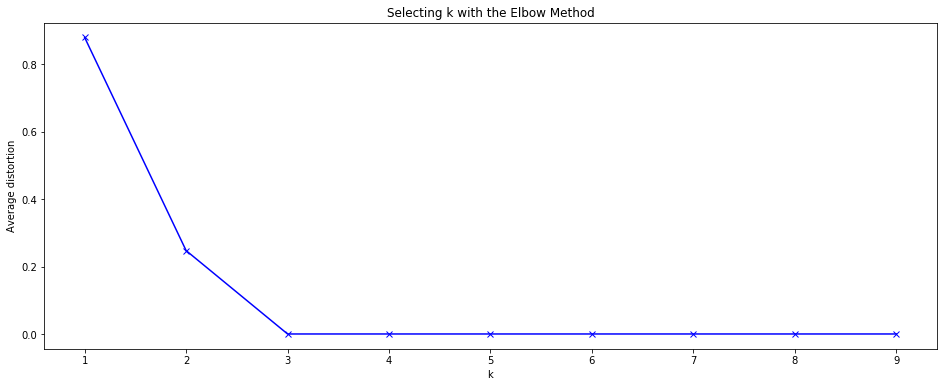

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 1 columns):
LTE_6265a    336 non-null float64
dtypes: float64(1)
memory usage: 2.7 KB
None
          LTE_6265a
count  3.360000e+02
mean   2.299748e-16
std    1.001491e+00
min   -2.075102e+00
25%   -4.904787e-01
50%   -4.904787e-01
75%    1.094145e+00
max    1.094145e+00


In [11]:
cell_load_data = kpi_filter_counter(kpi_data_norm, cell_load)

from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
K = range(1, 10)
meandistortions = []
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(cell_load_data)
    # cdist函数用于计算两个输入集合的距离，通过metric参数指定计算距离的不同方式得到不同的距离度量值   
    meandistortions.append(sum(np.min(cdist(cell_load_data, kmeans.cluster_centers_, 'euclidean'), axis=1)) / cell_load_data.shape[0])

fig = plt.figure(1,(16,6))
ax = fig.add_subplot(1,1,1)

ax.plot(K, meandistortions, 'bx-')
ax.set_xlabel('k')
ax.set_ylabel('Average distortion')
ax.set_title('Selecting k with the Elbow Method')
plt.show()

print(cell_load_data.info())
print(cell_load_data.describe())

##### 计算相关系数

In [12]:
def calc_corr(dataframe):
    corr = dataframe.corr()
    corr.dropna(axis=(0,1), how='all', inplace=True)
#     fig = plt.figure(figsize=(20,12))
#     sns.heatmap(corr, linewidths = 0.05);
    
    return corr

#####  特征选择

In [13]:
from sklearn.feature_selection import VarianceThreshold

# 方差选择，返回值为特征选择后的数据
# 参数threshold为方差的阈值
def variance_selection(data):
    sel = VarianceThreshold(threshold=0.81) #去掉那些方差超过0.81的值
    X = sel.fit_transform(data)
    feat_mask = sel.get_support() # Get a mask, or integer index, of the features selected
    # 保留mask值为0的特征
    columns = [data.columns[i] for i, e in enumerate(feat_mask) if e]
    data = pd.DataFrame(X, columns=columns)
    
    return data

##### sklearn异常值检测

In [14]:
# 定义异常值占总数据的百分比
outliers_fraction = 0.01

# 均值方差检测
def outlier_detect_std(sample, data):
    upper = np.mean(sample) + 3*np.std(sample)
    lower = np.mean(sample) - 3*np.std(sample)
    
    if (data>upper) or (data<lower):
        return True
    else:
        return False

def kpi_outlier_std(data):
    print('Mean-Std prediction:')   
    n = 0
    outlier = {}
    for i in data.columns:
        for j, elem in enumerate(data[i]):
            flag = outlier_detect_std(data[i], elem)       
            if flag == True:
                # 统计每一个样本中检测到的outlier的数目
                outlier[j] = outlier.get(j, 0) + 1

    # 按照每个样本中检测到的数值进行排序
    outlier_list = sorted(outlier.items(), key=lambda e:e[1], reverse=True)     
    outlier = [x[0] for x in outlier_list]
    print(outlier[:5])  
                
# LOF异常值检测
from sklearn.neighbors import LocalOutlierFactor
def kpi_outlier_lof(data):
    print('LOF prediction:')
    clf = LocalOutlierFactor(n_neighbors=50, contamination=outliers_fraction)
    y_pred = clf.fit_predict(data)  
    # negative_outlier_factor_: The lower, the more normal. 
    # Inliers tend to have a LOF score close to 1, while outliers tend to have a larger LOF score.
#     print(-clf.negative_outlier_factor_)
    
    print([i for i, e in enumerate(y_pred) if e==-1])
    

# Isolation forest异常值检测
from sklearn.ensemble import IsolationForest
def kpi_outlier_isoforest(data):
    print('Iosforest prediction:')
    clf = IsolationForest(n_estimators=100, n_jobs=-1, contamination=outliers_fraction)
    clf.fit(data)
    y_pred = clf.predict(data)
    # The anomaly score of the input samples. The lower, the more abnormal.
#     print(clf.decision_function(data))
    
    print([i for i, e in enumerate(y_pred) if e==-1])

D:\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [15]:
# 特征选择，去除不必要的特征
kpi_data_opt = variance_selection(kpi_data_norm)

kpi_outlier_std(kpi_data_opt)

kpi_outlier_lof(kpi_data_opt)

kpi_outlier_isoforest(kpi_data_opt)

Mean-Std prediction:
[21, 200, 277, 268, 20]
LOF prediction:
[199, 200, 268, 277]
Iosforest prediction:
[6, 20, 21, 124]


##### pydf异常值检测

Model 1 Cluster-based Local Outlier Factor (CBLOF)
[21, 199, 268, 277]
Model 2 Feature Bagging
[199, 200, 268, 277]
Model 3 Histogram-base Outlier Detection (HBOS)
[6, 109, 151, 282]
Model 4 Isolation Forest
[21, 151, 268, 277]
Model 5 K Nearest Neighbors (KNN)
[199, 200, 268, 277]
Model 6 Average KNN
[277]
Model 7 Median KNN
[199, 200, 268, 277]
Model 8 Local Outlier Factor (LOF)
[199, 200, 268, 277]
Model 9 One-class SVM (OCSVM)
[199, 200, 268, 277]
Model 10 Principal Component Analysis (PCA)
[21, 199, 268, 277]


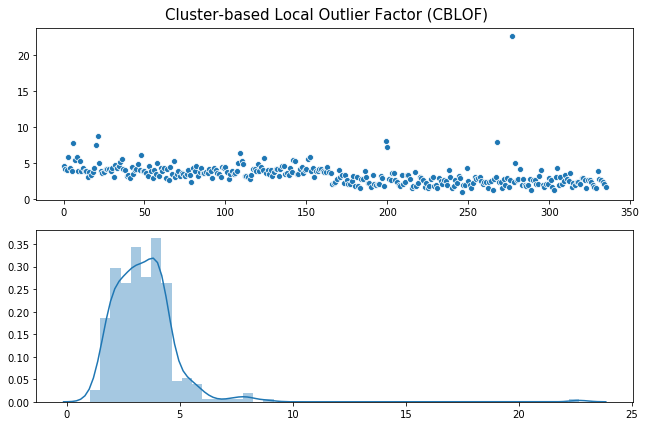

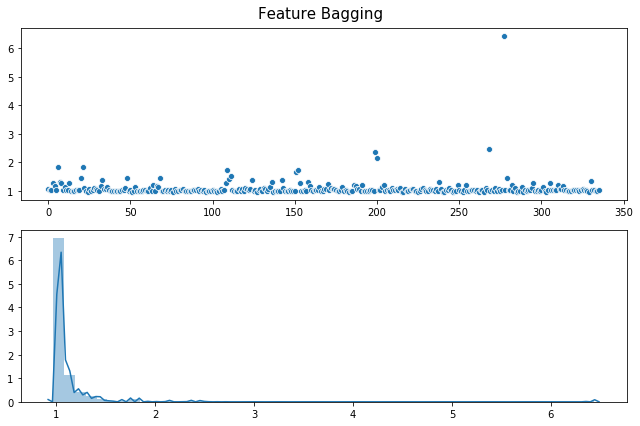

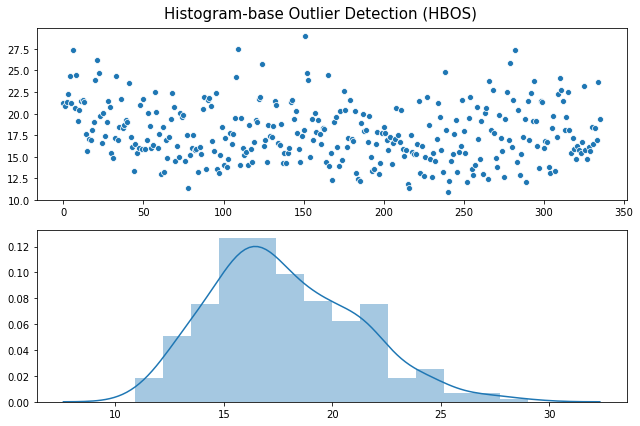

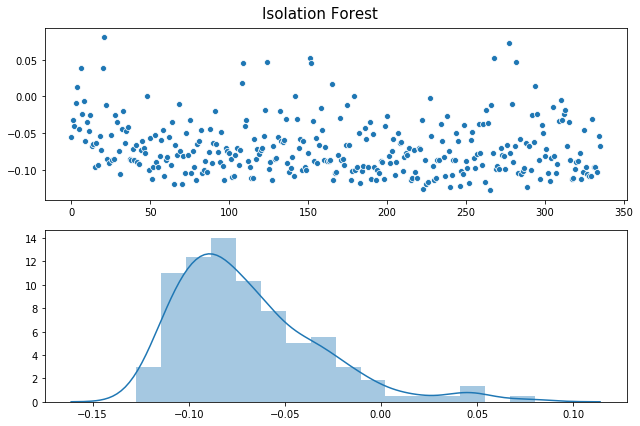

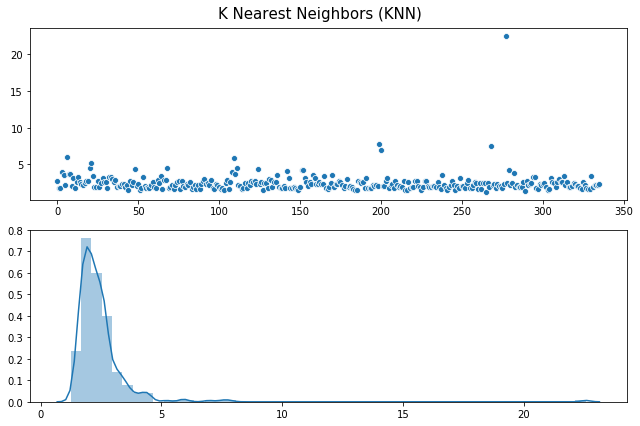

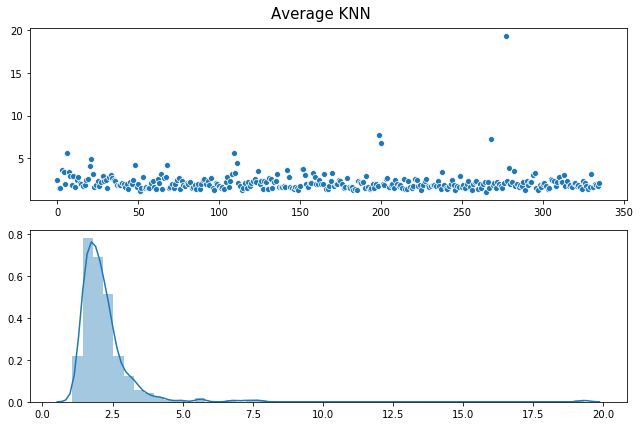

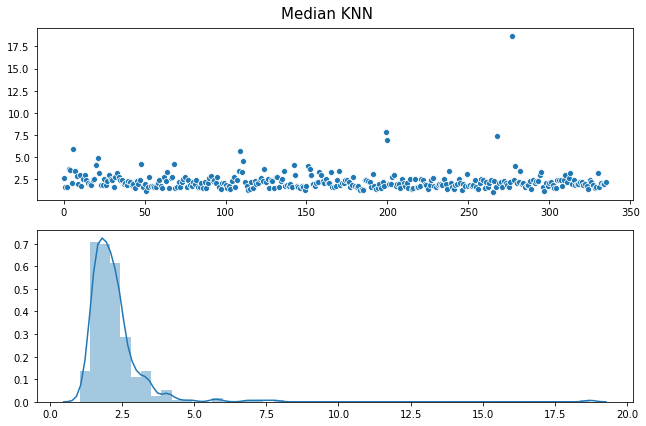

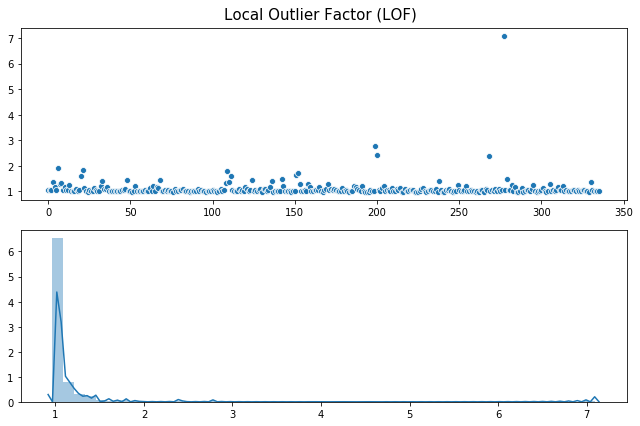

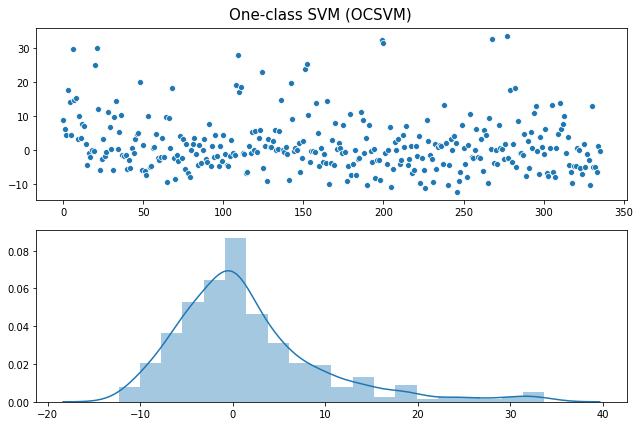

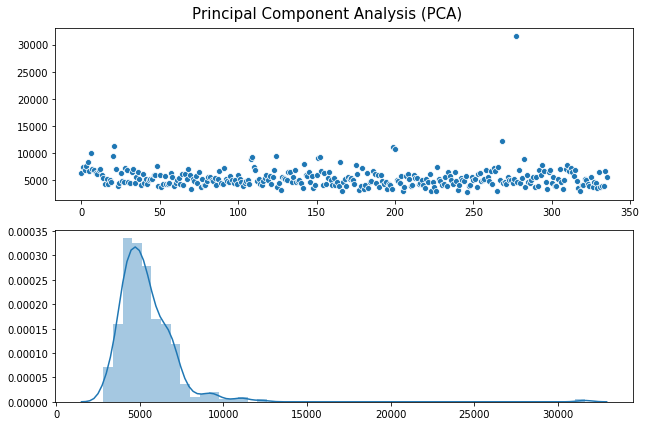

In [16]:
def visualize(score, title):
    fig = plt.figure(figsize=(9,6))
    ax1 = fig.add_subplot(211)
    sns.scatterplot(data=score, ax=ax1)
    ax2 = fig.add_subplot(212)
    sns.distplot(score, ax=ax2)
    plt.tight_layout()
    plt.subplots_adjust(top=0.93)
    fig.suptitle(title, fontsize=15)


# Import all models
from pyod.models.cblof import CBLOF
from pyod.models.feature_bagging import FeatureBagging
from pyod.models.hbos import HBOS
from pyod.models.iforest import IForest
from pyod.models.knn import KNN
from pyod.models.lof import LOF
from pyod.models.ocsvm import OCSVM
from pyod.models.pca import PCA

from scipy import stats

random_state = np.random.RandomState(0)
X = kpi_data_opt
# Define nine outlier detection tools to be compared
classifiers = {
               'Cluster-based Local Outlier Factor (CBLOF)':
                   CBLOF(contamination=outliers_fraction, 
                         check_estimator=False, random_state=random_state),
               'Feature Bagging':
                   FeatureBagging(LOF(n_neighbors=35),
                                  contamination=outliers_fraction,
                                  check_estimator=False,
                                  random_state=random_state),
               'Histogram-base Outlier Detection (HBOS)': 
                   HBOS(contamination=outliers_fraction),
               'Isolation Forest': 
                   IForest(contamination=outliers_fraction,
                           random_state=random_state),
               'K Nearest Neighbors (KNN)': 
                   KNN(contamination=outliers_fraction),
               'Average KNN': 
                   KNN(method='mean', contamination=outliers_fraction),
               'Median KNN': 
                   KNN(method='median', contamination=outliers_fraction),
               'Local Outlier Factor (LOF)':
                   LOF(n_neighbors=35, contamination=outliers_fraction),
               'One-class SVM (OCSVM)': 
                   OCSVM(contamination=outliers_fraction,
                         random_state=random_state),
               'Principal Component Analysis (PCA)': 
                   PCA(contamination=outliers_fraction, 
                       random_state=random_state),
               }

for i, (clf_name, clf) in enumerate(classifiers.items()):
    print('Model', i + 1, clf_name)
    clf.fit(X)
    y_pred = clf.predict(X)
    y_pred_scores = clf.decision_scores_
    print([i for i, e in enumerate(y_pred) if e==1])
    threshold = stats.scoreatpercentile(y_pred_scores, 100 * outliers_fraction)
    
    visualize(y_pred_scores, clf_name)